In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
path_to_files = "stock_data/"
# path_to_sentiments1 = "stock_news_sentiment_scores/2011-2024/stock_news_sentiment_analysis_results_"
path_to_sentiments = "stock_news_sentiment_scores/2011-2024/stock_news_sentiment_analysis_results_"

stock_symbols = ['GOOG', 'MSFT', 'NVDA','AMZN','AAPL']

k = 0
print(stock_symbols[k])

GOOG


In [94]:
stock_sentiment = pd.read_csv(path_to_sentiments+stock_symbols[k]+".csv")
stock_price = pd.read_csv(path_to_files+stock_symbols[k]+"/stock_price.csv")

In [95]:
print(stock_sentiment.keys())
print(stock_price.keys())

Index(['Date', 'Ticker', 'weighted positive sentiment score',
       'weighted negative sentiment score', 'weighted neutral sentiment score',
       'weighted compound sentiment score'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [96]:
stock_sentiment.sample(10)

,Date,Ticker,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
702,2021-10-19,GOOG,0.228173,0.111000,0.862312,0.420519
1458,2024-04-04,GOOG,0.275265,0.244630,0.901999,0.105743
141,2018-03-27,GOOG,0.108000,0.000000,0.892000,0.440400
1377,2024-01-08,GOOG,0.310749,0.000000,0.795281,0.484013
493,2021-01-14,GOOG,0.107000,0.391263,0.715813,-0.636986
1091,2023-02-10,GOOG,0.313918,0.312534,0.826380,0.002817
291,2020-04-23,GOOG,0.242230,0.213207,0.888186,0.033818
1368,2023-12-29,GOOG,0.348296,0.340769,0.716492,-0.059326
1592,2024-08-27,GOOG,0.149000,0.000000,0.931497,0.102700
674,2021-09-19,GOOG,0.194000,0.000000,0.806000,0.113900


In [97]:
# plt.plot(stock_sentiment["Date"], stock_sentiment["Weighted compound sentiment score"])

KeyError: 'Weighted compound sentiment score'

In [99]:
# Initialize dictionaries
df_sentiment_scores_dict = {}
df_stock_data_dict = {}
sentiment_scores = {}
stock_data = {}
stock_diff_close_open = {}

start_date = pd.to_datetime('2012-01-01').date()
end_date = pd.to_datetime('2022-01-01').date()

for symbol in stock_symbols:
    # Load sentiment and stock data
    df_sentiment_scores_dict[symbol] = pd.read_csv(path_to_sentiments+symbol+".csv")
    df_stock_data_dict[symbol] = pd.read_csv(path_to_files+symbol+"/stock_price.csv")

    # Convert date columns to datetime and extract date part only as `datetime.date`
    df_sentiment_scores_dict[symbol]['Date'] = pd.to_datetime(df_sentiment_scores_dict[symbol]['Date'], utc = True).dt.date
    df_stock_data_dict[symbol]['Date'] = pd.to_datetime(df_stock_data_dict[symbol]['Date'], utc= True).dt.date
    
    # Filter sentiment scores based on date range
    mask_sentiment = (df_sentiment_scores_dict[symbol]['Date'] >= start_date) & (df_sentiment_scores_dict[symbol]['Date'] <= end_date)
    sentiment_filtered = df_sentiment_scores_dict[symbol][mask_sentiment]

    # Filter stock data based on date range and intersecting dates
    stock_dates = df_stock_data_dict[symbol]['Date']
    mask_stock = (stock_dates >= start_date) & (stock_dates <= end_date) & (stock_dates.isin(sentiment_filtered['Date']))
    stock_filtered = df_stock_data_dict[symbol][mask_stock]

    # Align both DataFrames by keeping only common dates
    common_dates = sentiment_filtered['Date'][sentiment_filtered['Date'].isin(stock_filtered['Date'])]
    sentiment_aligned = sentiment_filtered[sentiment_filtered['Date'].isin(common_dates)]
    stock_aligned = stock_filtered[stock_filtered['Date'].isin(common_dates)]

    # Calculate the weighted rolling mean on aligned data for sentiment scores
    sentiment_scores[symbol] = sentiment_aligned['Weighted compound sentiment score']#.rolling(rw).apply(weighted_mean, raw=True)
    
    # Calculate the weighted rolling mean for the difference between 'Close' and 'Open' prices
    stock_diff_close_open[symbol] = (stock_aligned['Close'] - stock_aligned['Open'])#.rolling(rw).apply(weighted_mean, raw=True)
    stock_data[symbol] = stock_aligned#.rolling(rw).apply(weighted_mean, raw=True)
    stock_data[symbol]['sentiment'] = sentiment_scores[symbol]



ValueError: Cannot set a DataFrame with multiple columns to the single column sentiment

In [68]:
# sentiment_scores['GOOG'].shape

(642,)

In [77]:
print(stock_data['GOOG'].shape)
print(stock_data.keys())

columns = stock_data['GOOG'].keys()
print(columns)

(642, 9)
dict_keys(['GOOG', 'MSFT', 'NVDA', 'AMZN', 'AAPL'])
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'sentiment'],
      dtype='object')


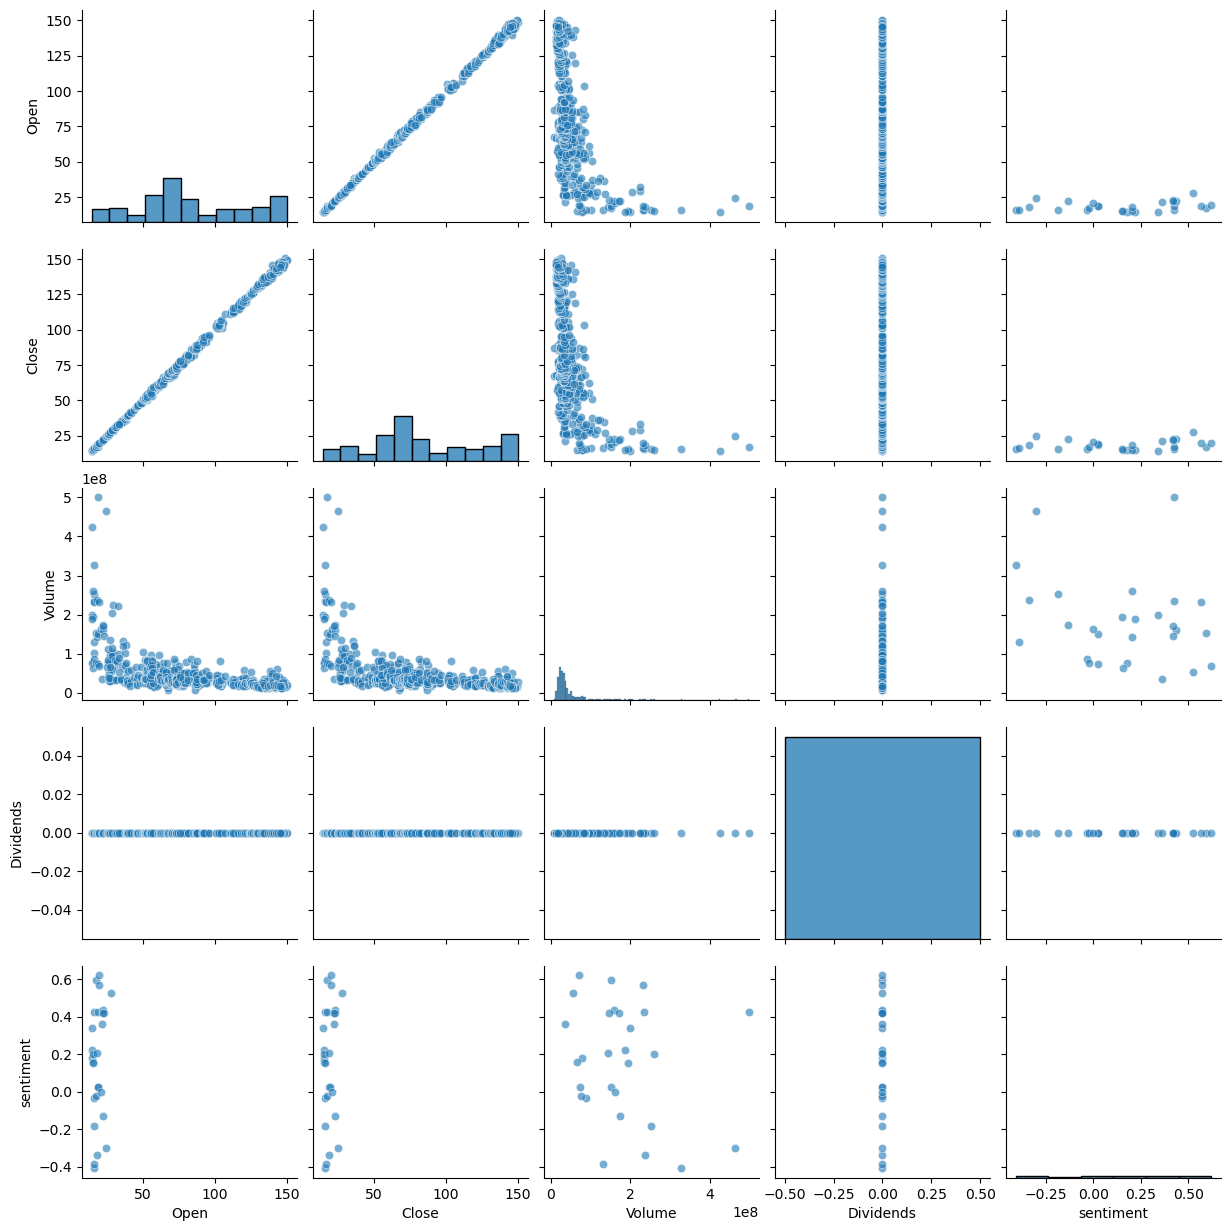

In [83]:


sns.pairplot(data = stock_data['GOOG'],
                x_vars = ['Open', 'Close', 'Volume', 'Dividends', 'sentiment'],
                y_vars = ['Open', 'Close', 'Volume', 'Dividends', 'sentiment'],
                plot_kws = {'alpha':.6})

plt.show()

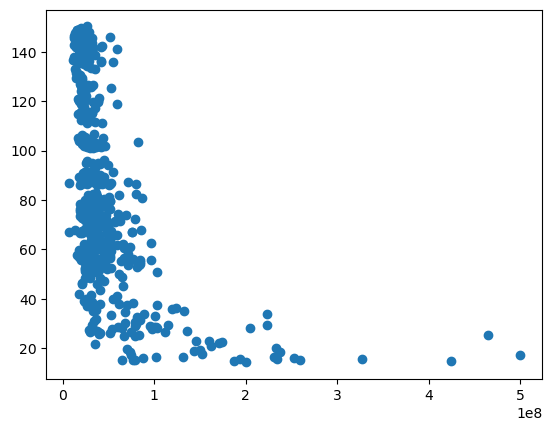

In [91]:
plt.scatter(stock_data['GOOG']['Volume'], stock_data['GOOG']['Close'])